### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 29th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [58]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [59]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
import time

# MRS Load in the data
data = np.load('../../../homeworks/hw_data/hw7_data_1.npy')
X = data[:, :2]
y = data[:, 2]
yerr = data[:, 3]

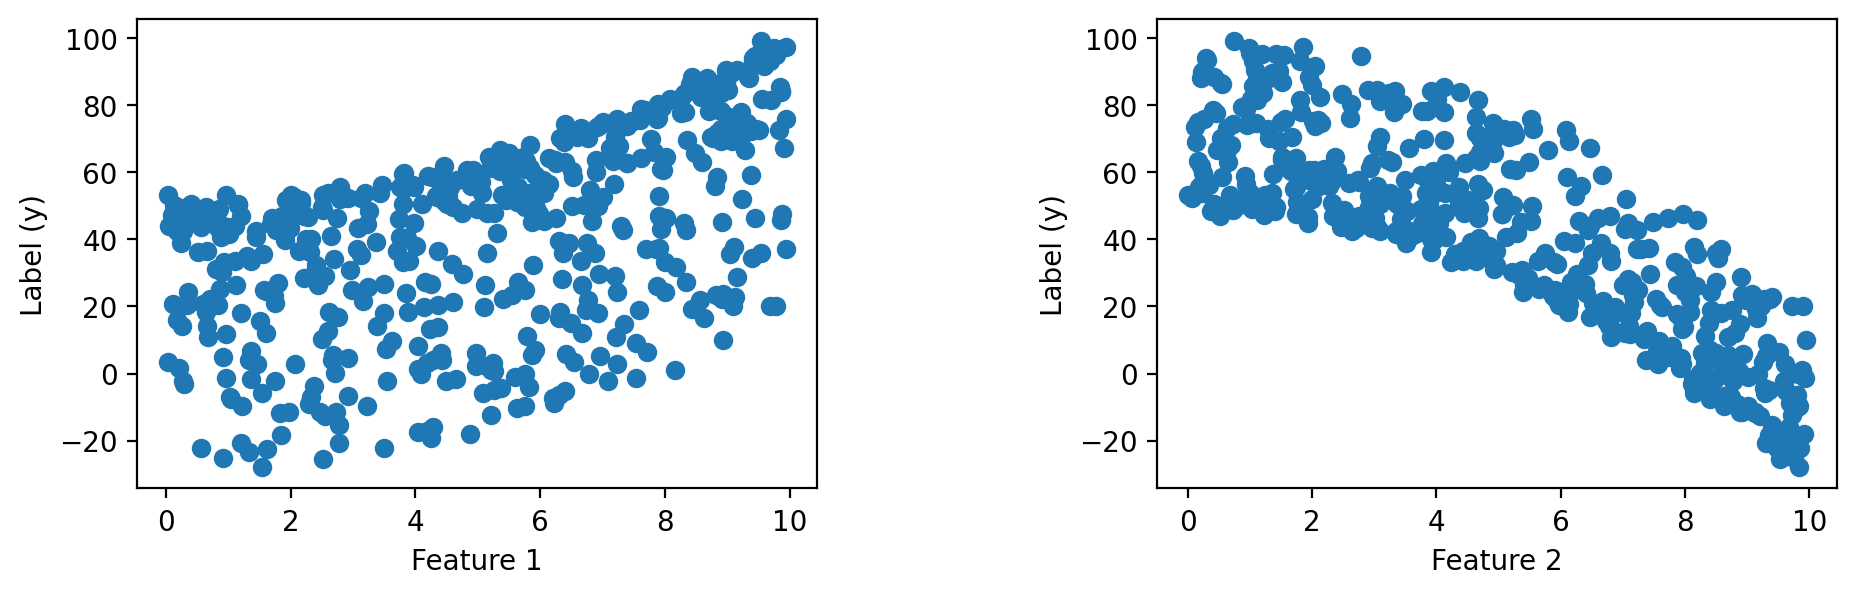

In [60]:
# MRS Visualizing Feature 1 and Feature 2 with the Label data
fig = plt.figure(figsize=(10, 3.4))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# MRS Feature 1 vs Target Labels
ax = fig.add_subplot(121)
ax.scatter(X[:, 0], y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Label (y)')


# MRS Feature 2 vs Target Labels
ax = fig.add_subplot(122)
ax.scatter(X[:, 1], y)
ax.set_xlabel('Feature 2')
ax.set_ylabel('Label (y)')


plt.show()

[57.10102323  4.94873016 -8.30023407]


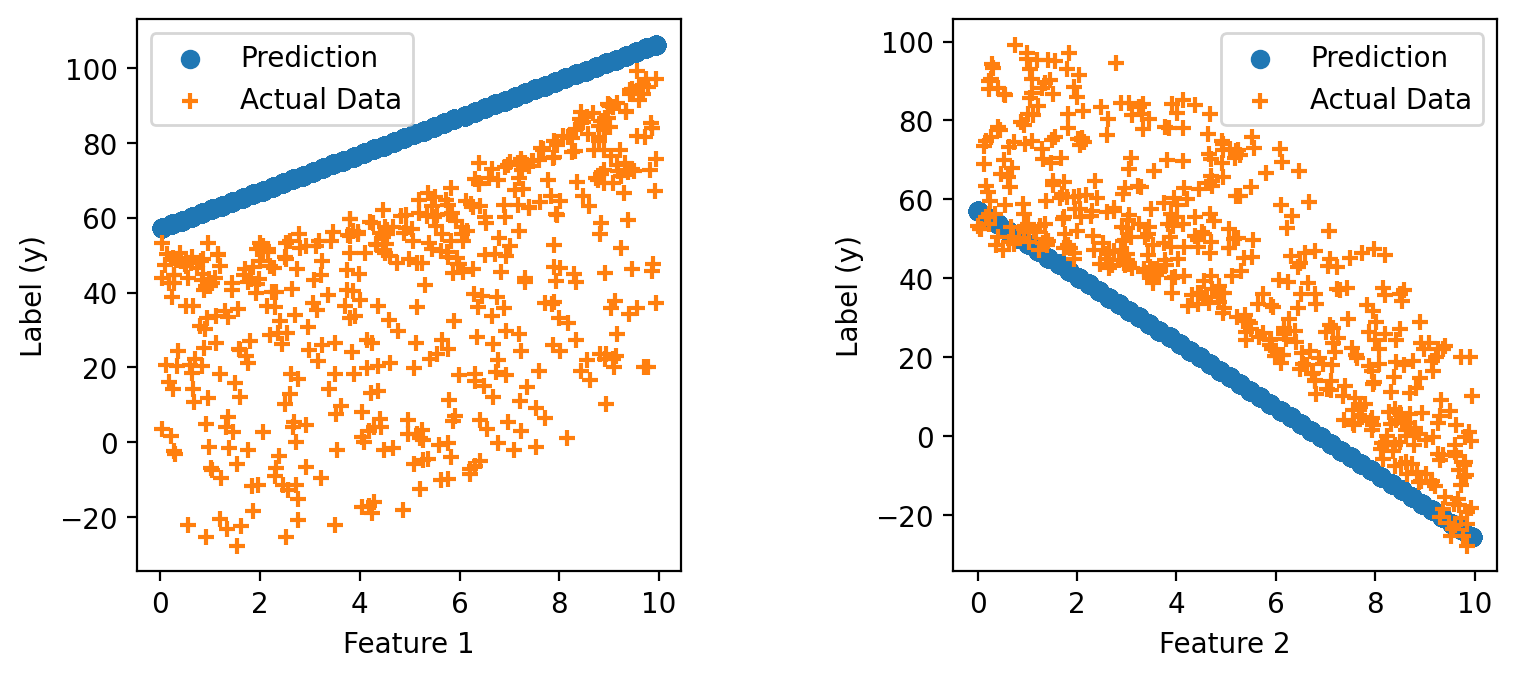

In [61]:
from astroML.linear_model import LinearRegression

# MRS Fit the data using Linear Regression
model = LinearRegression()
model.fit(X, y, yerr)

print(model.coef_)

# MRS Define a 50 element grid spanning min to max of each feature
xgrid_1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
xgrid_2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)

# MRS Define an arbitrary zeros array so that we can visualize just one feature prediction 
zero = np.zeros(len(xgrid_1))

# MRS creating a meshgrid to evaluate one feature at a time, 
Xgrid1 = np.vstack(list(map(np.ravel, np.meshgrid(xgrid_1, zero)))).T
Xgrid2 = np.vstack(list(map(np.ravel, np.meshgrid(zero, xgrid_2)))).T

# MRS Predict the values evaluated at each point in the xgrid for each feature
y_pred1 = model.predict(Xgrid1)
y_pred2 = model.predict(Xgrid2)


# MRS Visualize the predicted values
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)

# MRS Feature 1 vs Target Label
ax = fig.add_subplot(121)
ax.scatter(Xgrid1[:, 0], y_pred1, label='Prediction')
ax.scatter(X[:, 0], y, marker='+', label='Actual Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Label (y)')
ax.legend()


# MRS Feature 2 vs Target Label
ax = fig.add_subplot(122)
ax.scatter(Xgrid2[:, 1], y_pred2, label='Prediction')
ax.scatter(X[:, 1], y, marker='+', label='Actual Data')

ax.set_xlabel('Feature 2')
ax.set_ylabel('Label (y)')
ax.legend()

plt.show()


This is a meh fit and I DONT like it :(

SRT: That's fair!

[57.10102323  4.94873016 -8.30023407]


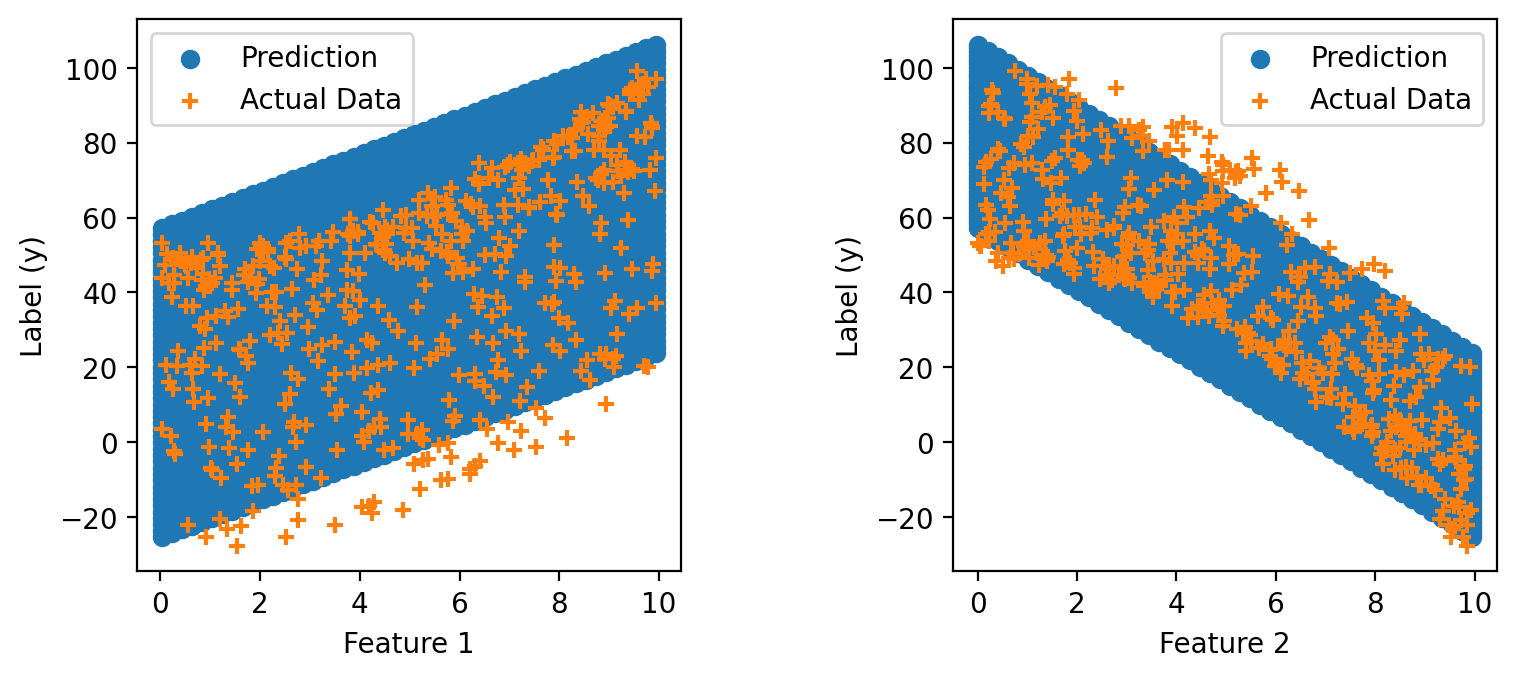

In [62]:
from astroML.linear_model import LinearRegression

# MRS Now we are going to do the same as above but instead fit on 2D prediction meshgrid
model = LinearRegression()
model.fit(X, y, yerr)

print(model.coef_)

# MRS Define a 50 element grid spanning min to max of each feature
xgrid_1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 50)
xgrid_2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)

# MRS Create the combined meshgrid and find predicted values on this grid
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(xgrid_1, xgrid_2)))).T
y_pred = model.predict(Xgrid)


# MRS Visualize the 2D prediction grid
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)

# MRS Feature 1 vs Taget Label
ax = fig.add_subplot(121)
ax.scatter(Xgrid[:, 0], y_pred, label='Prediction')
ax.scatter(X[:, 0], y, marker='+', label='Actual Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Label (y)')
ax.legend()


# MRS Feature 2 vs Target Label
ax = fig.add_subplot(122)
ax.scatter(Xgrid[:, 1], y_pred, label='Prediction')
ax.scatter(X[:, 1], y, marker='+', label='Actual Data')

ax.set_xlabel('Feature 2')
ax.set_ylabel('Label (y)')
ax.legend()

plt.show()


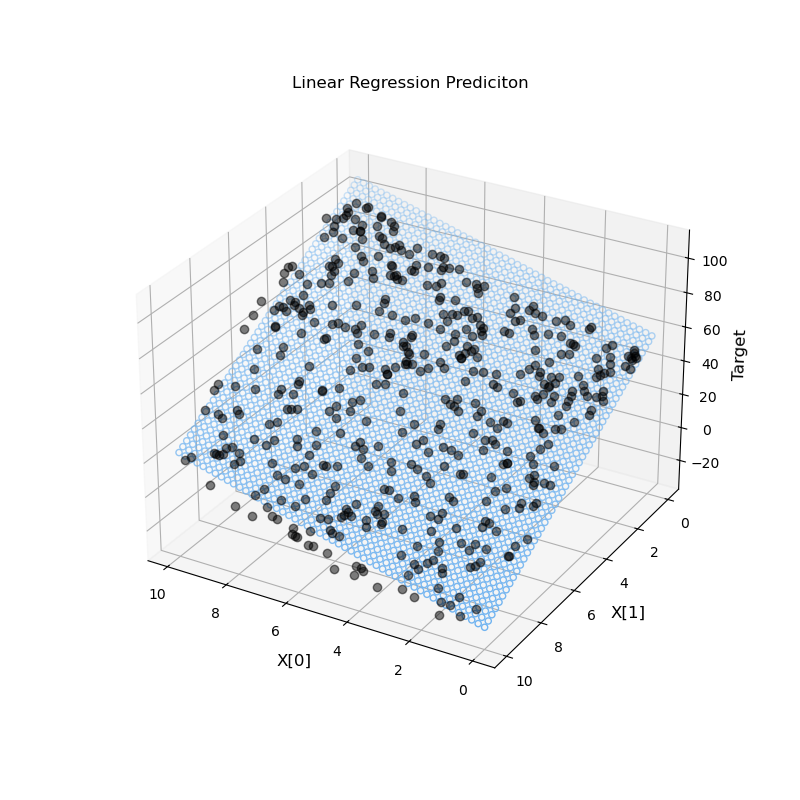

In [63]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Linear Regression Prediciton')
ax.view_init(elev=28, azim=120)
plt.show()

In [64]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# MRS Initialize the ridge parameters that we will fun the GridSearchCV procedure on
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
grid_search = GridSearchCV(Ridge(), ridge_params)
grid_search.fit(X, y)

# MRS Print out the best parameters and best score for Ridge
print(grid_search.best_params_)
print(grid_search.best_score_)

# MRS Define the Ridge Regression using the bet hyper parameters
best_model = Ridge(alpha=1.0, solver='svd')

# MRS saw that best_estimator_ also prints out the best ridge model to use (So you could use either method I just thought best_estimator_ was a neat little attribute)
best_model = grid_search.best_estimator_
best_model.fit(X,y)

# MRS Predict across the 2D grid
y_pred_ridge = best_model.predict(Xgrid)

{'alpha': 1.0, 'solver': 'svd'}
0.9290800590702192


SRT: Good, but what about data uncertainties in the fit? -1 point

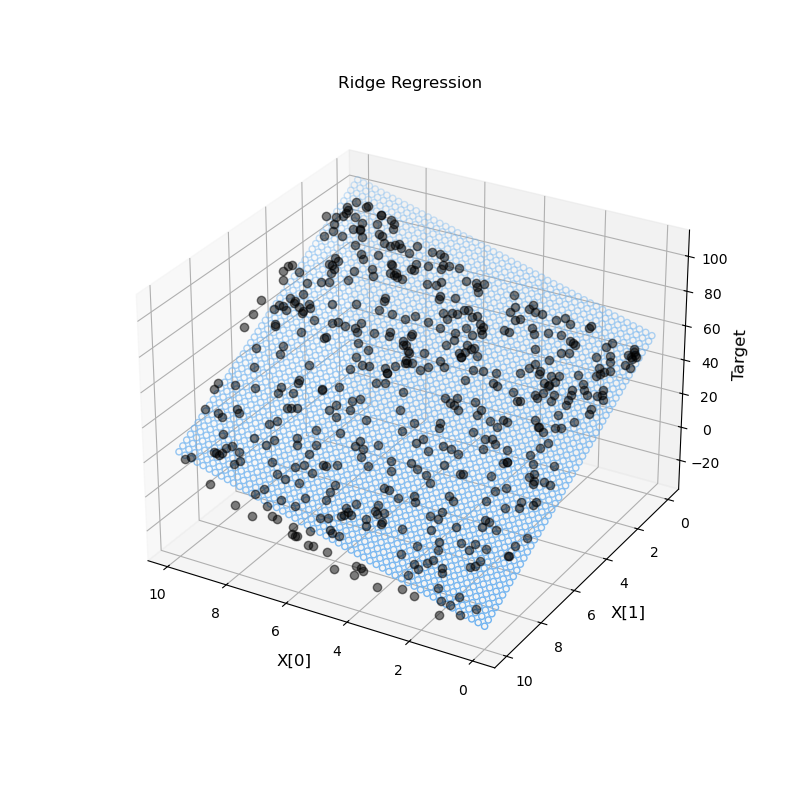

In [66]:
# MRS Visualization of the Ridge Regression Prediction
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_ridge, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Ridge Regression')

ax.view_init(elev=28, azim=120)
plt.show()

In [67]:
from sklearn.linear_model import RidgeCV

# MRS Now performing the Ridge CV across the different alpha values from before
model = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0])
model.fit(X,y)

print(model.alpha_)
print(model.best_score_)

# This alpha value matches the alpha value that we found with the GridSearchCV, but with a different best_score_



1.0
-59.219995871614245


SRT: Good

In [68]:
from sklearn.gaussian_process import GaussianProcessRegressor

# MRS Initializing the two Guassian Process Regressors, one with error, one without error
# MRS Alpha is the calculation of the error to be passed to the GaussianProcessRegressor
alpha_gpr = (yerr/y)**2

#without error
gp = GaussianProcessRegressor() # MRS Initialize Regression
gp.fit(X,y) # MRS Fit Data
y_pred_GPR = gp.predict(Xgrid) # MRS Make prediction on 2D grid


#with error
gp = GaussianProcessRegressor(alpha=alpha_gpr)
gp.fit(X,y)
y_pred_GPRerr = gp.predict(Xgrid)

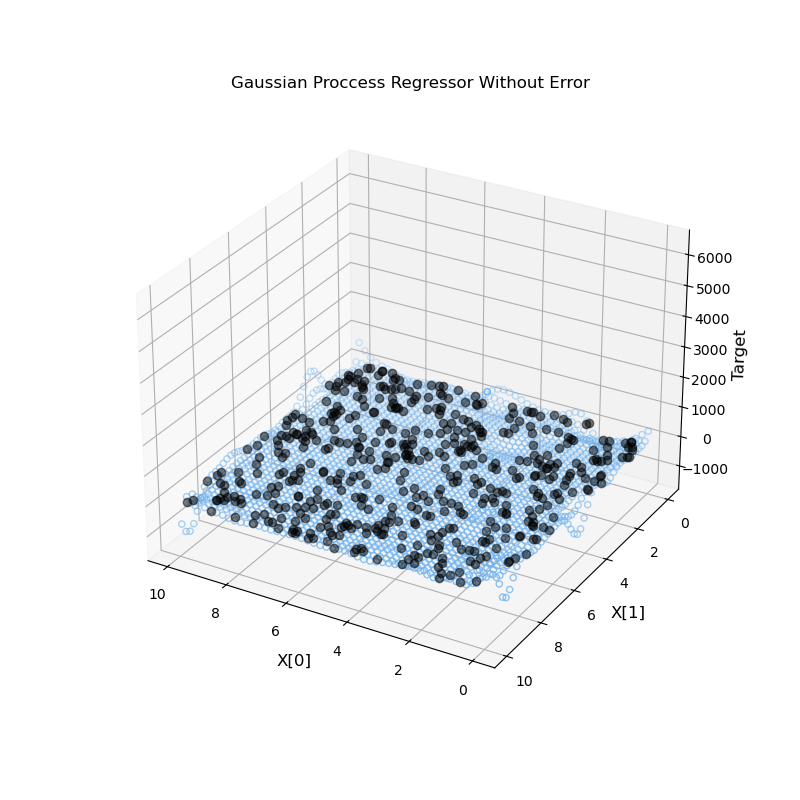

In [69]:
# MRS Visualize the predictions of the GPR without Error
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_GPR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_title('Gaussian Proccess Regressor Without Error')
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
plt.show()

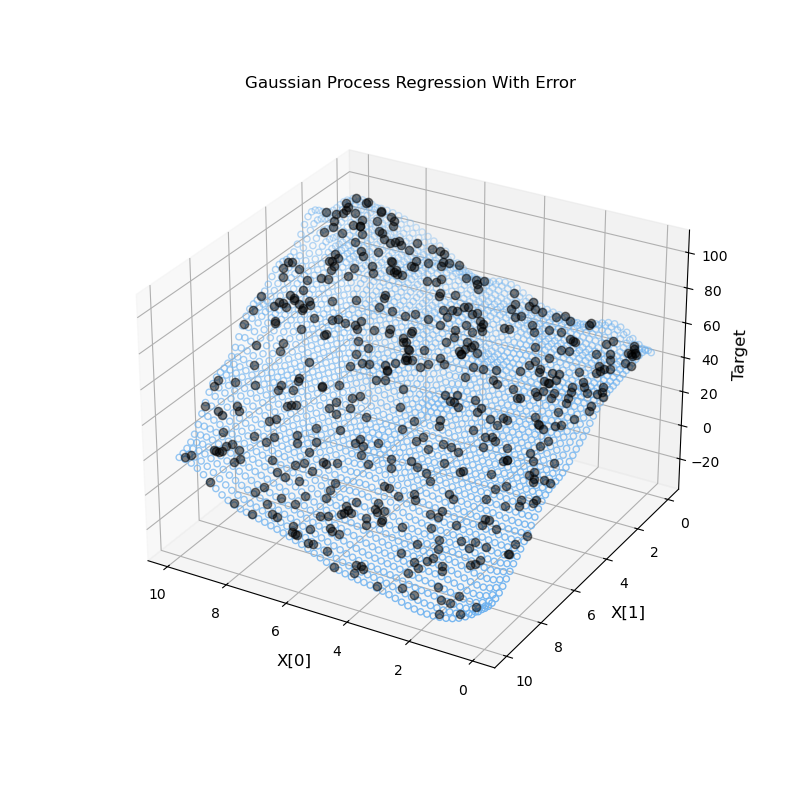

In [70]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_GPRerr, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('Gaussian Process Regression With Error')

ax.view_init(elev=28, azim=120)
plt.show()

In [71]:
from astroML.linear_model import PolynomialRegression

# MRS Fitting a 4th degree Polynomial 
poly = PolynomialRegression(4)
poly.fit(X,y)
print(poly.coef_)
y_pred_poly = poly.predict(Xgrid)

[ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


SRT: Uncertainties? -1 point

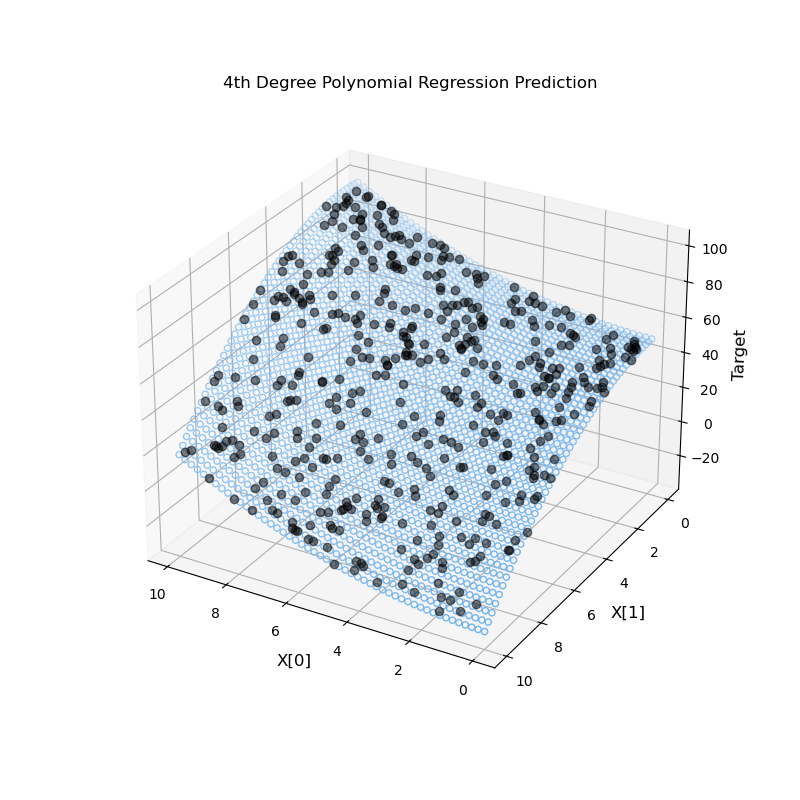

In [72]:
# MRS Visualize the Prediction from the 4th Degree Polynomial Regression
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_poly, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('4th Degree Polynomial Regression Prediction')
ax.view_init(elev=28, azim=120)
plt.show()

From Lecture 9 we can use, 
$${\rm BIC} = \chi^2 + k \ln N,$$ 

Where,

$$ \chi^2_\mathrm{dof}  = \frac{1}{N-k} \sum_i^N \left( \frac{y - y_\mathrm{fit}}{\sigma_y} \right)^2, $$

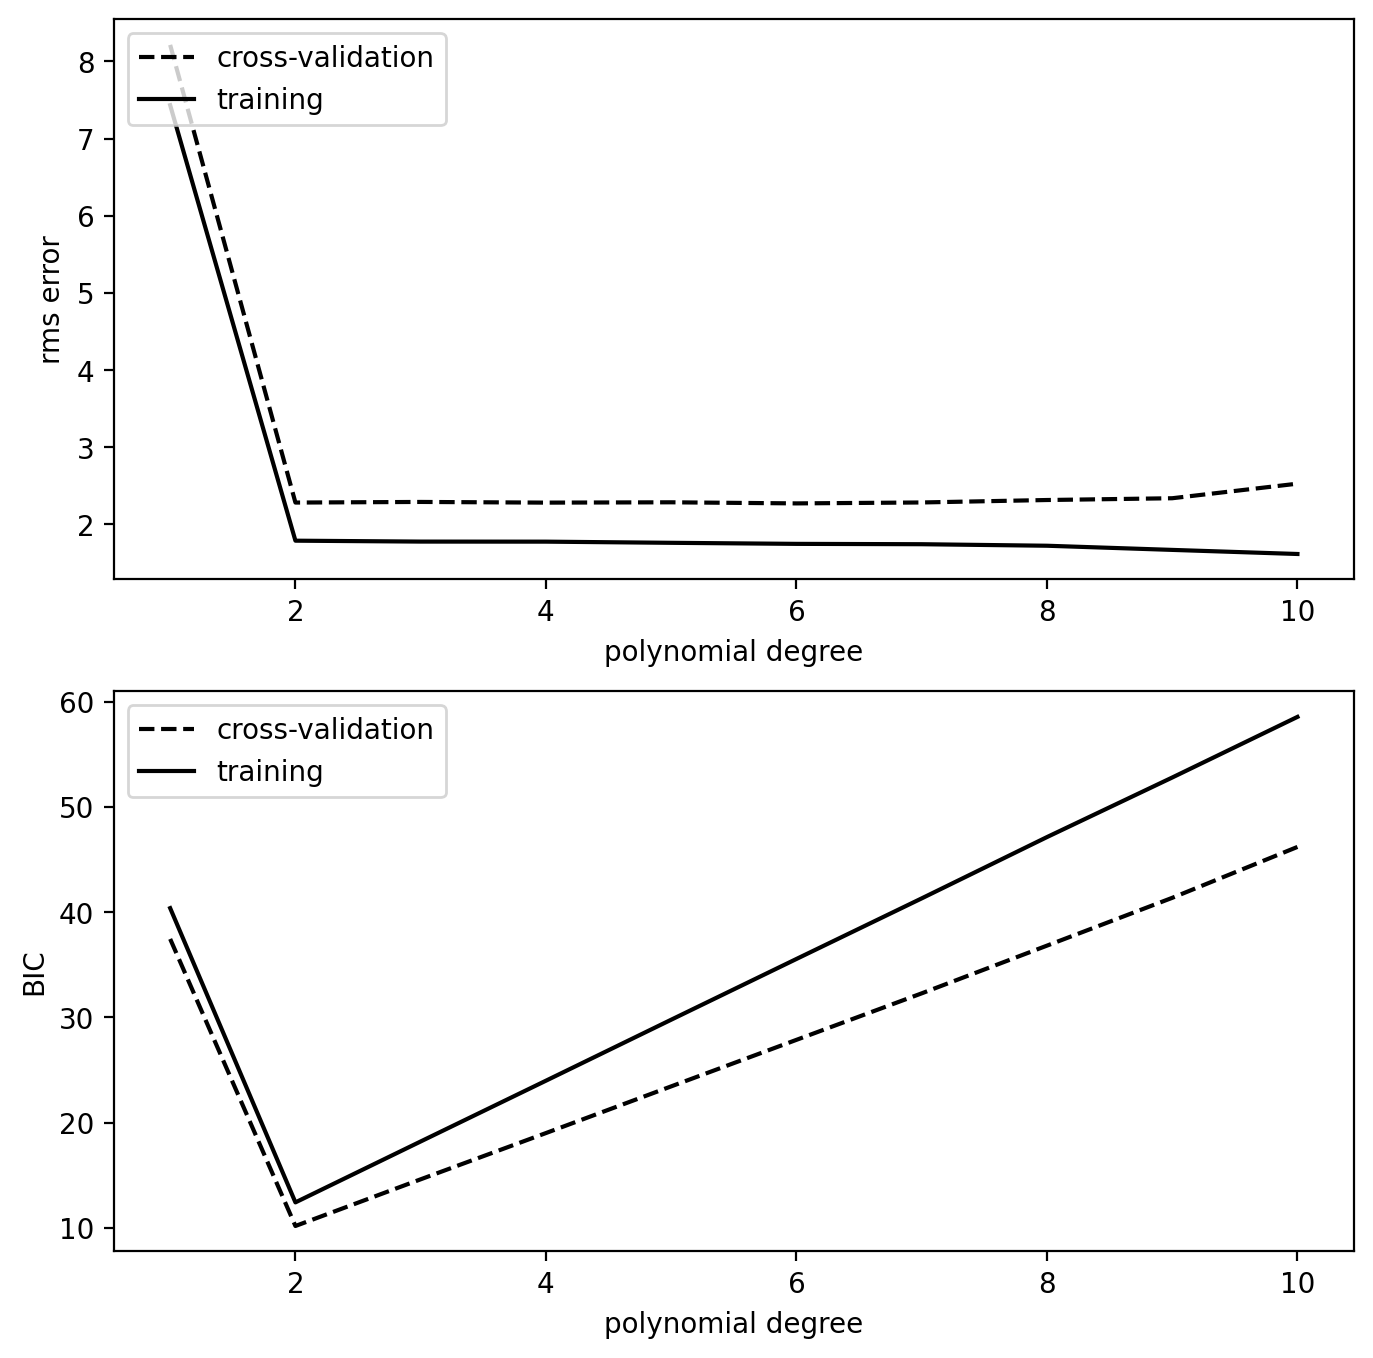

In [73]:
from  sklearn.model_selection import train_test_split


# MRS Splitting our data set into 20% testing and 80% training, then splitting a further 20% for cross-validation
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2)
X_train, X_cvs, y_train, y_cvs, yerr_train, yerr_cvs = train_test_split(X_train, y_train, yerr_train, test_size=0.2)

# MRS Initializing the array to sweep through different degree polynomials from 1 to 10 inclusive
poly_deg = np.arange(1, 11)
training_err = np.zeros(poly_deg.shape)
crossval_err = np.zeros(poly_deg.shape)
chi_dof_train = np.zeros(poly_deg.shape)
chi_dof_cvs = np.zeros(poly_deg.shape)
BIC_train = np.zeros(poly_deg.shape)
BIC_crossval = np.zeros(poly_deg.shape)

%matplotlib inline
# MRS was having an issue where switching to inline still had all of the widget figures open
plt.close('all')

fig = plt.figure(figsize=(8, 8))
for i in range(len(poly_deg)):
    # MRS Initialize the nth degree polynomial regression
    p = PolynomialRegression(poly_deg[i])
    # MRS Fit on the training set
    p.fit(X_train,y_train)
      
    # MRS calculate the training rms error, cross-validation  rms error
    training_err[i] = np.sqrt(np.sum((p.predict(X_train) - y_train) ** 2)
                              / len(y_train))
    crossval_err[i] = np.sqrt(np.sum((p.predict(X_cvs) - y_cvs) ** 2)
                              / len(y_cvs))
    # MRS Using chi squared to evalute the BIC, calcualte chi squared for both train and cross-validation set
    chi_dof_train[i] = 1/(len(y_train) - poly_deg[i]) * np.sum(((y_train-p.predict(X_train))/yerr_train)**2)
    chi_dof_cvs[i] = 1/(len(y_cvs) - poly_deg[i]) * np.sum(((y_cvs-p.predict(X_cvs))/yerr_cvs)**2)

    # MRS Calcualte the BIC for both the train and cross-validation sets
    BIC_train[i] = chi_dof_train[i] + poly_deg[i] *np.log(len(y_train)) 
    BIC_crossval[i] = chi_dof_cvs[i] + poly_deg[i] *np.log(len(y_cvs)) 

# MRS Visualize the rms error for training set and cross-validation set
ax = fig.add_subplot(211)
ax.plot(poly_deg, crossval_err, '--k', label='cross-validation')
ax.plot(poly_deg, training_err, '-k', label='training')

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

# MRS Visualize the BIC values for the training set and cross-validation set
ax = fig.add_subplot(212)
ax.plot(poly_deg, BIC_crossval, '--k', label='cross-validation')
ax.plot(poly_deg, BIC_train, '-k', label='training')


ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()


In [78]:
# MRS based on the plot fitting a 2nd degree polynomial would be best
p = PolynomialRegression(2)
p.fit(X_train,y_train)
    
# MRS cacluate the rms error on the test set
test_err = np.sqrt(np.sum((p.predict(X_test) - y_test) ** 2)
                            / len(y_test))

print(f'rsm test error: {test_err:.3f}')


rsm test error: 1.954


SRT: Good job, Mike. You missed out fitting with uncertainties again, but I already penalized you earlier for that.

48/50